In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import mpld3
import numpy as np
import itertools
from tabulate import tabulate

# change these imports???
from svgpathtools import *
from svg_extract_data import *

#%matplotlib notebook
#%matplotlib inline
mpld3.enable_notebook()

In [2]:
# svg2paths does not apply relevant transformation to paths!
#paths, attributes = svg2paths('edelweiss_ER_band_GGA3.svg')

# Document does apply relevant transformations, it's what you need
"""
doc = Document('edelweiss_ER_band_GGA3.svg')
doc = doc.flatten_all_paths()
print (doc[0].path[0].start.real)
print(len(doc[0].path))
print (doc[0].path[0].length())
"""

"\ndoc = Document('edelweiss_ER_band_GGA3.svg')\ndoc = doc.flatten_all_paths()\nprint (doc[0].path[0].start.real)\nprint(len(doc[0].path))\nprint (doc[0].path[0].length())\n"

In [3]:
# in ER, GGA3
# paths with 4 lines are error bars, bounding box
# paths with 10 are the bins, huh
# paths with 13 are the resolution curves
# path with 12 is the top/right axis with ticks
# paths wth 5 is left axis with ticks
# paths with 6 is bottom axis with ticks

# in NR, GGA3
# paths with 4 lines are maybe some of the data points?
# path with 5 lines is axis box with bottom tick marks
# two paths with 6 lines: (1) bin marks and (2) left y-axis with tick marks
# paths with 7 lines are maybe more data points?
# paths with 8 lines are resolution curve (0 index) and data points
# paths with 8, 13 are the resolution curves
# path with 12 is the top/right axis with ticks

# for bands, GGA1
# paths with 4 lines seem to be data points (doesn't graph so well, there are lots!)
# path with 7 lines is some kind of curve
# path with 13 lines also curve
# path with 17 lines left y-axis with minor, major ticks
# path with 19 lines a curve
# path with 21 a curve
# path with 22 bottom x-axis with minor, major ticks
# paths with 23 lines are both curves
# path with 40 lines is top/right axes with minor, major ticks and line at Y=1
# path with 46 lines seems to be the ER band, both top and bottom

def get_paths(doc, path_len):
    #import matplotlib.pyplot as plt
    #import numpy as np
    path_arr = []
    
    #print ([len(result.path) for result in doc])
    
    for result in doc:
        path = result.path

        if len(path) == path_len: # maybe these are error bars?
            path_arr.append(path)
            #print (path)
            #for line in path:
                # if the line is NOT a Bezier curve
                #if not hasattr(line, 'control1'):
                    #print ("plotting, ", len(path))

    return path_arr

def plot_paths(paths):
    for path in paths:
        for line in path:
            #print(path)
            plt.plot([line.start.real,line.end.real],[line.start.imag,line.end.imag],'ro-',label='python')
            
    #plt.ylim(0,200)
    #plt.xlim(0,200)


23


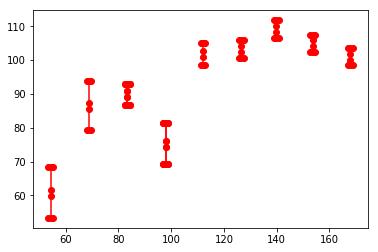

In [46]:
if True:
    doc = Document('edelweiss_ER_band_GGA3.svg')
    doc = doc.flatten_all_paths()

    paths4_NR = get_paths(doc, 4)
    #paths7_NR = get_paths(doc, 7)
    #paths8_NR = get_paths(doc, 8)
    print(len(paths7_NR))
    #plot_paths(paths8_NR[1::])
    #plot_paths(paths4_NR)
    #plot_paths(paths7_NR)
    #print(paths4_NR)

    #do not want these indices from paths4: 0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21
    #WANT these indices from paths4: 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22
    #paths_NR = list(itertools.chain(*[paths4_NR[2:2:22]]))
    paths_NR = paths4_NR[2:24:2]
    plot_paths(paths_NR)
    plt.show()

In [47]:
doc_ER = Document('edelweiss_ER_band_GGA3.svg')
doc_ER = doc_ER.flatten_all_paths()

# these are the points for the ER graph
graph_points_ER = np.array([(0,0), (50,0), (100,0), (150,0), (200,0), (0,0.05), (0,0.1), (0,0.15)])

# get_calib_fn (doc, graph_points):
xcalib_fn_ER, ycalib_fn_ER = get_calib_fn(doc_ER, graph_points_ER)
    
#print(xcalib_fn_ER(54.4), ycalib_fn_ER(64.4))
#print(xcalib_fn_ER(68.8), ycalib_fn_ER(86))

34.73079000000004 175.06081 1.6618999999999744 147.37939999999998
[Line(start=(34.730800000000016+2.5768999999999664j), end=(175.06080000000006+2.5768999999999664j)), Line(start=(175.06080000000006+147.37939999999998j), end=(34.730800000000016+147.37939999999998j)), Line(start=(34.730800000000016+147.37939999999998j), end=(175.0608+147.37939999999998j))] [Line(start=(175.06080000000006+2.5768999999999664j), end=(175.06080000000006+147.37939999999998j)), Line(start=(34.730800000000016+147.37939999999998j), end=(34.730800000000016+2.5768999999999664j)), Line(start=(48.77955+147.37939999999998j), end=(48.77955+2.4343999999999824j)), Line(start=(62.8283+147.37939999999998j), end=(62.8283+2.41689999999997j)), Line(start=(76.8783+147.37939999999998j), end=(76.8783+1.6618999999999744j)), Line(start=(90.84705+147.37939999999998j), end=(90.84705+2.6393999999999664j)), Line(start=(104.89580000000001+147.37939999999998j), end=(104.89580000000001+2.509399999999971j)), Line(start=(118.9445499999999

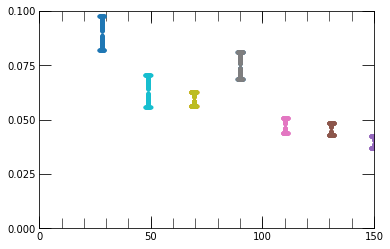

'Erecoil (keV)'    '1-sigma NR width'    'Error in 1-sigma NR width'
90.0584            0.0747106             0.00624391
69.2411            0.0595757             0.00326667
189.844            0.0480805             0.00260557
169.528            0.0439048             0.00264636
149.802            0.0396461             0.00277004
130.914            0.0456006             0.00277133
110.253            0.0471714             0.00343179
90.0584            0.0747106             0.00624391
69.2411            0.0595757             0.00326667
48.6497            0.0630496             0.00748389
28.0233            0.0896375             0.00777397


In [54]:
# path 0: 68.75 keV inelastic scattering
# path 1: average NR line
# path 2: 13.26 keV inelastic
# path 3: ionization threshold
# path 4: lower nuclear recoil band
# path 5: upper nuclear recoil band
# path 6: upper and lower electron recoil band
x_arr = np.linspace(0,1,200)
point_table = []
x = []
y = []
y_err = []
for idx, path in enumerate(paths_NR):
    path0_arr = get_points_from_path(path, x_arr, xcalib_fn_ER, ycalib_fn_ER)
    
    # store in point_table for use later
    point_table.append(path0_arr[:,0])
    point_table.append(path0_arr[:,1])
    
    # get the mean and errors in kind of a hack way
    x_min = np.min(path0_arr[:,0])
    x_max = np.max(path0_arr[:,0])
    y_min = np.min(path0_arr[:,1])
    y_max = np.max(path0_arr[:,1])
    
    x.append(np.mean([x_min, x_max]))
    y.append(np.mean([y_min, y_max]))
    y_err.append(0.5*(y_max - y_min))
    
    if True:
        #print (x, y, x_err, y_err)
        plt.plot(path0_arr[:,0], path0_arr[:,1],'.')

#path1_arr = get_points_from_path(paths_GGA1[1], x_arr, xcalib_fn, ycalib_fn)

#plt.plot(path0_arr[:,0], path0_arr[:,1],'r')
#plt.plot(path1_arr[:,0], path1_arr[:,1],'r--')
minorLocatorX = MultipleLocator(10)
minorLocatorY = MultipleLocator(0.1)
ax = plt.gca()
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
#plt.ylim(min(graph_points_NR[:,1]),max(graph_points_NR[:,1]))
plt.ylim(0,0.1)
plt.yticks(list(set(graph_points_NR[:,1])))
plt.tick_params(which="major", right=True, top=True, direction="in", length=12)
plt.tick_params(which="minor", right=True, top=True, direction="in", length=10)
# see https://jdhao.github.io/2017/06/03/change-aspect-ratio-in-mpl/
#ax.set_aspect(0.75*1.0/ax.get_data_ratio())
plt.xlim(0,150)
plt.xticks(list(set(graph_points_NR[:,0])))
plt.show()

#for path in paths_GGA1:
    
table = np.column_stack([x, y, y_err])
#print(table)
headers=["'Erecoil (keV)'", "'1-sigma NR width'", "'Error in 1-sigma NR width'"]
print (tabulate(table, headers=headers, tablefmt="plain", numalign="left"))

if False:
    with open("edelweiss_ERwidth_GGA3_data.txt", "w") as text_file:
        print(tabulate(table, headers=headers, tablefmt="plain", numalign="left"), file=text_file)